In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 결측치 채우기
* 강수량 : 해당 날짜에 강수 소식 없음 확인 -> 0  
* 일조합 : 결측치가 5개라 평균 값으로 대체

In [3]:
train.isnull().sum()

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

In [4]:
test.isnull().sum()

date               0
precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64

In [5]:
train['precipitation'] = train['precipitation'].fillna(0)
train['sunshine_sum'] = train['sunshine_sum'].fillna(train['sunshine_sum'].mean())

test['precipitation'] = test['precipitation'].fillna(0)
test['sunshine_sum'] = test['sunshine_sum'].fillna(train['sunshine_sum'].mean())

---
* 미세먼지, 초미세먼지 값 대체

C:\Users\Jaechul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='PM10'>

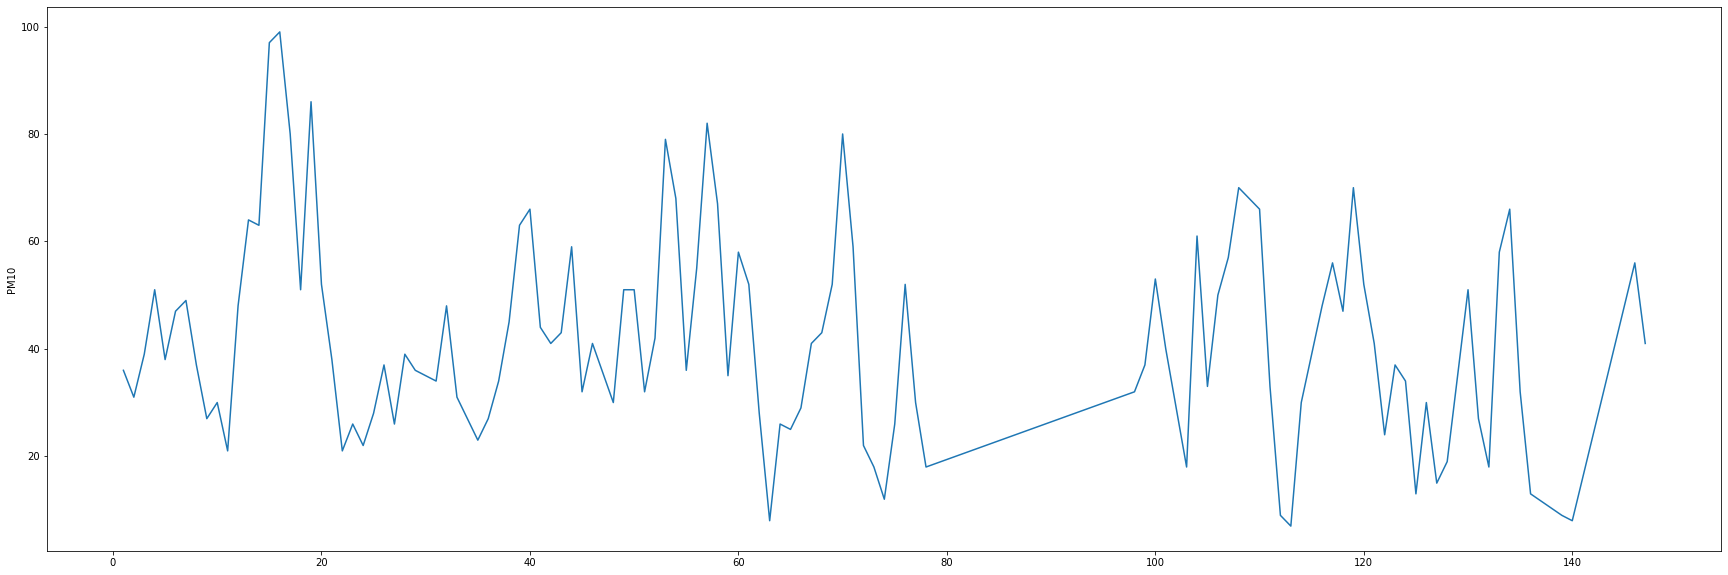

In [6]:
# 원본
plt.figure(figsize =(30,10))
sns.lineplot(train.iloc[1:150].index, train.iloc[1:150]['PM10'])

<AxesSubplot:>

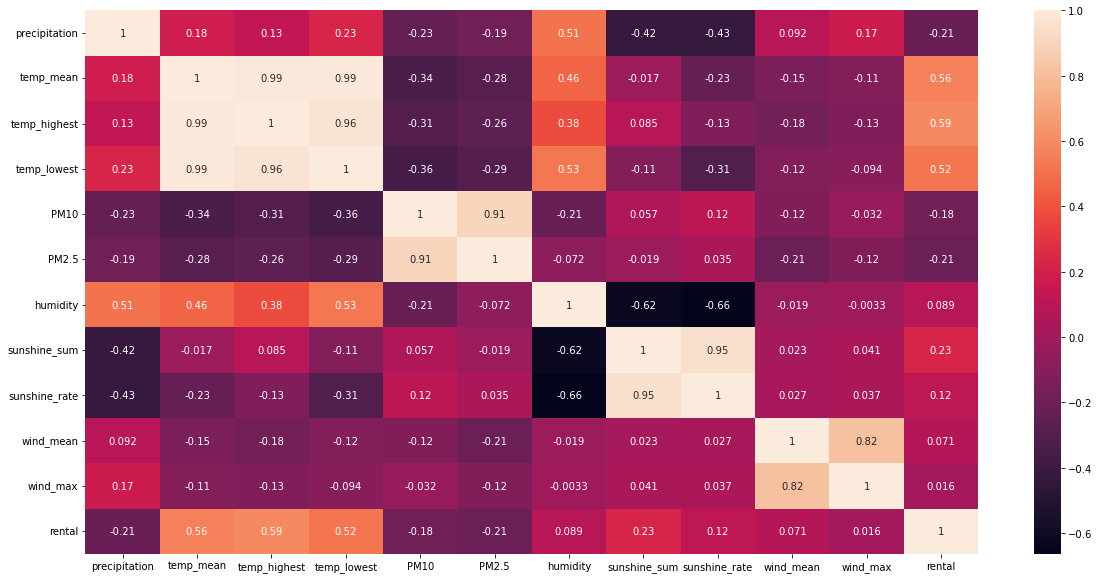

In [7]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot=True)

# temp_mean, sunshine_rate, wind_mean, precipitation

In [8]:
train_dropna = train.dropna()
use_cols = ['temp_mean', 'sunshine_rate', 'wind_mean', 'precipitation']

X = train_dropna[use_cols]
y = train_dropna['PM10']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

13.828992533953317

In [12]:
# MSE
from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(MSE)
rmse = MSE**0.5
rmse

18.608962471657033

In [13]:
# 결측치 있는 데이터만
train_na = train.drop(columns=['PM2.5'])
train_na = train_na[train_na.isna().any(axis=1)]

# 결측치 없는 데이터만
train_no = train.drop(columns=['PM2.5'])
train_no = train_no.dropna()

# 모델에 학습
y_pred_fin = model.predict(train_na[use_cols])

train_na['PM10'] = y_pred_fin

train_model = pd.concat([train_na, train_no], axis=0)
train_model = train_model.sort_values('date')

PM10_df = pd.DataFrame(train_model['PM10'])

C:\Users\Jaechul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='PM10'>

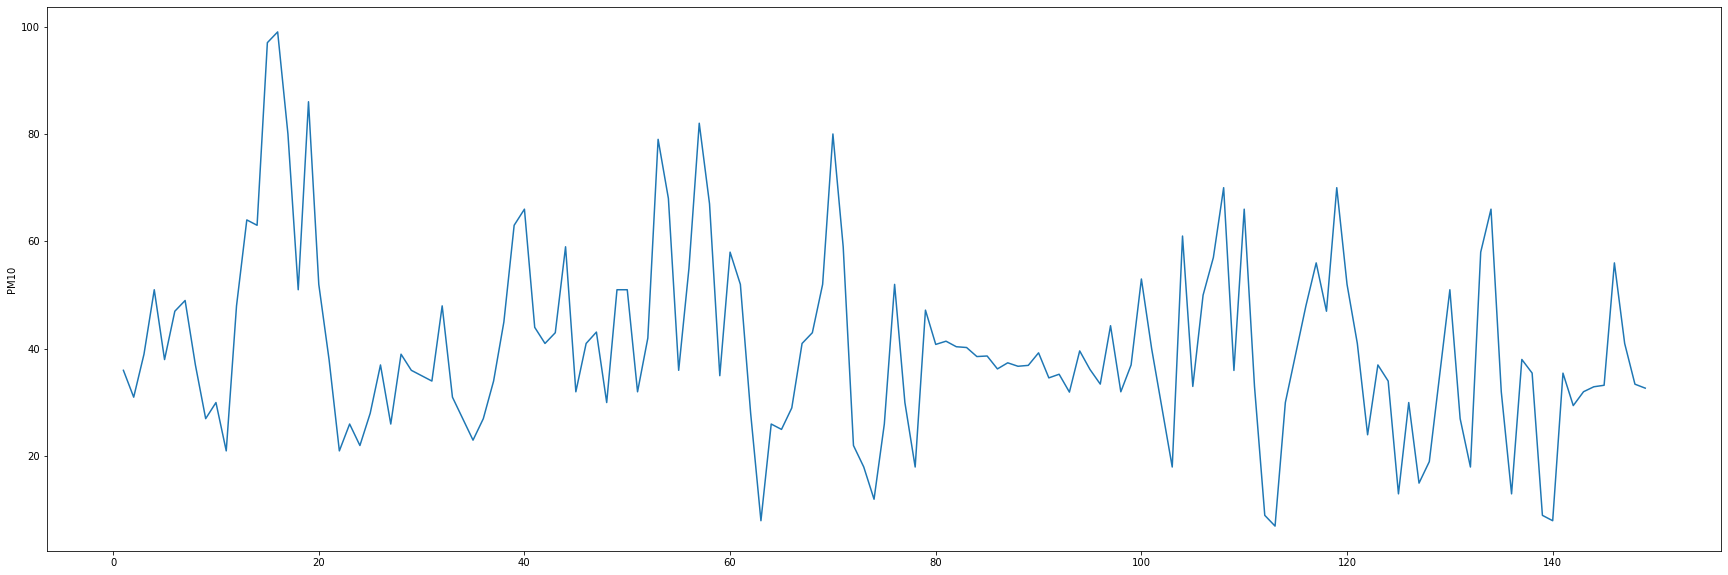

In [14]:
plt.figure(figsize =(30,10))
sns.lineplot(train_model.iloc[1:150].index, train_model.iloc[1:150]['PM10'])

* 초미세먼지

In [15]:
train_dropna = train.dropna()
use_cols = ['temp_mean', 'sunshine_rate', 'wind_mean', 'precipitation']

X = train_dropna[use_cols]
y = train_dropna['PM2.5']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)

# 결측치 있는 데이터만
train_na = train.drop(columns=['PM10'])
train_na = train_na[train_na.isna().any(axis=1)]

# 결측치 없는 데이터만
train_no = train.drop(columns=['PM10'])
train_no = train_no.dropna()

# 모델에 학습
y_pred_fin = model.predict(train_na[use_cols])

train_na['PM2.5'] = y_pred_fin

train_model = pd.concat([train_na, train_no], axis=0)
train_model = train_model.sort_values('date')

In [16]:
train = pd.concat([train_model, PM10_df], axis=1)
train.columns =['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
                 'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
                 'wind_mean', 'wind_max', 'rental']

train['rental'] = train['rental'].astype('int')
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,0.0,-1.3,3.8,-5.1,17.0,39.1,8.3,86.5,1.4,3.8,4950,34
1,2018-01-02,0.0,-1.8,1.8,-4.3,22.0,42.0,7.9,82.3,1.8,4.9,7136,36
2,2018-01-03,0.0,-4.7,-0.4,-7.1,19.0,42.3,8.6,88.7,2.2,3.5,7156,31
3,2018-01-04,0.0,-4.7,-0.7,-8.7,24.0,43.0,6.2,63.9,1.4,3.5,7102,39
4,2018-01-05,0.0,-3.0,1.6,-5.6,35.0,48.4,8.2,84.5,1.7,3.6,7705,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,42.0,62.9,5.9,61.5,1.8,2.8,37103,70
1091,2020-12-28,1.3,6.7,11.4,4.2,44.0,72.1,8.0,83.3,1.4,3.1,46912,66
1092,2020-12-29,0.2,0.1,4.3,-6.2,46.0,70.8,0.0,0.0,2.9,6.1,35747,69
1093,2020-12-30,0.0,-10.9,-6.2,-12.9,15.0,55.5,8.3,86.5,4.1,6.2,22488,39


---
## 기준모델

* 평가지표 = NMAE

In [17]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [18]:
# 기준모델 = 평균
pred = train['rental'].mean()
true = train['rental']

NMAE(true, pred)

0.579059604123191

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

pred1 = [pred] * len(true)

print('MAE :', mean_absolute_error(true, pred1))
print('MSE :', mean_squared_error(true, pred1))
print('RMSE :', np.sqrt(mean_squared_error(true, pred1)))
print('R2 :', r2_score(true, pred1))

MAE : 14.263714267842621
MSE : 376.81351097766935
RMSE : 19.411684908262583
R2 : 0.0


---
## 예측모델

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [27]:
target = 'rental'

X_train = train.drop(['date', target], axis=1)
y_train = train[target]

X_test = test.drop('date', axis=1)

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)

#train데이터 스케일링
X_train_sc = scaler.transform(X_train) 

#test데이터 스케일링
X_test_sc = scaler.transform(X_test)

In [31]:
# 교차검증..  scoring을 어떻게 해야하지..


model_dt = DecisionTreeRegressor(random_state=10)

dist_dt = {'max_depth' : randint(5, 50),
           'min_samples_leaf' : randint(5, 50),
           'max_features' : ['sqrt', 'log2', None]}

clf_dt = RandomizedSearchCV(model_dt,
                            param_distributions = dist_dt,
                            n_iter = 20,
                            cv = 5,
                            scoring = 'neg_mean_absolute_error',
                            verbose = 1,
                            n_jobs = -1,
                            random_state = 2)

clf_dt.fit(X_train_sc, y_train)

print(-clf_dt.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
6.22673387845628


In [32]:
model_rf = RandomForestRegressor(random_state=10)

dist_rf = {'n_estimators' : randint(10, 1000),
           'max_depth' : randint(5, 50),
           'min_samples_leaf' : randint(5, 50),
           'max_features' : ['sqrt', 'log2', None]}

clf_rf = RandomizedSearchCV(model_rf,
                            param_distributions = dist_rf,
                            n_iter = 20,
                            cv = 5,
                            scoring = 'neg_mean_absolute_error',
                            verbose = 1,
                            n_jobs = -1,
                            random_state = 2)

clf_rf.fit(X_train_sc, y_train)

print(-clf_rf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
5.649299227662687


In [33]:
model_xg = XGBRegressor(random_state=10)

dist_xg = {'n_estimators' : randint(10, 1000),
           'max_depth' : randint(5, 50),
           'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf_xg = RandomizedSearchCV(model_xg,
                            param_distributions = dist_xg,
                            n_iter = 20,
                            cv = 5,
                            scoring = 'neg_mean_absolute_error',
                            verbose = 1,
                            n_jobs = -1,
                            random_state = 2)

clf_xg.fit(X_train_sc, y_train)

print(-clf_xg.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
5.589405537522547


---

In [34]:
def Baseline_NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

def Baseline_MAE(true, pred):
    score = np.mean(np.abs(true - pred))
    return score

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sc, y_train)
y_hat = model.predict(X_train_sc)


NMAE_score = Baseline_NMAE(y_train, y_hat)
MAE_score = Baseline_MAE(y_train, y_hat)

print(f'Baseline NMAE : {NMAE_score}')
print(f'Baseline MAE : {MAE_score}')

Baseline NMAE : 0.14815979957542785
Baseline MAE : 4.744726383948903
